In [3]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import json
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df = pd.read_csv("cleaned data/產量_臺灣芭樂生產概況(2011~2019).csv")
df

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,番石榴,38469.0,37544.0,55.15,53.61,15.89,11131.37,596.75
1,2019,台北市,番石榴,2106.0,2106.0,3.35,3.35,14.37,9031.34,30.25
2,2019,桃園市,番石榴,17584.0,13838.0,29.05,22.84,15.78,9562.00,218.40
3,2019,台中市,番石榴,89075.0,87291.0,129.60,127.17,26.48,18175.94,2311.43
4,2019,台南市,番石榴,1198472.0,1196656.0,1499.21,1496.94,28.27,22596.20,33825.16
...,...,...,...,...,...,...,...,...,...,...
193,2011,基隆市,番石榴,665.0,665.0,0.96,0.96,10.21,7072.92,6.79
194,2011,新竹市,番石榴,1174.0,1174.0,1.68,1.68,30.24,21130.95,35.50
195,2011,嘉義市,番石榴,11178.0,11178.0,13.50,13.50,34.18,28303.56,382.10
196,2011,金門縣,番石榴,0.0,0.0,0.00,0.00,0.00,0.00,0.00


### 選取欲使用欄位

In [5]:
cols = ['年度', '地區別', '果品類別', '種植面積_公頃', '收穫面積_公頃', '產量_公噸']
df_test = df[cols]

In [6]:
df_test.dtypes

年度           int64
地區別         object
果品類別        object
種植面積_公頃    float64
收穫面積_公頃    float64
產量_公噸      float64
dtype: object

### 輔助圖表(2011~2019變化)

#### 總產量趨勢圖

In [7]:
df.groupby("年度").sum().round(1)

,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
年度,,,,,,,
2011,4887625.0,4759236.0,6899.5,6727.3,539.6,368694.4,168848.5
2012,5005145.0,4891721.0,7034.0,6882.1,563.8,383464.2,181178.1
2013,5094901.0,5024735.0,7171.0,7081.9,554.5,375335.2,182479.2
2014,5040749.0,4976765.0,7130.0,7044.0,541.0,362354.0,168392.0
2015,5357088.0,5306178.0,7165.3,7091.5,505.7,344683.3,150686.5
2016,5359585.0,5326772.0,7159.5,7113.1,478.8,331210.7,133075.3
2017,5480891.0,5432472.0,7325.7,7258.4,539.3,369480.2,172981.8
2018,5562237.0,5475145.0,7441.0,7320.0,540.0,365790.0,176305.0
2019,5744627.0,5636480.0,7581.8,7433.2,545.3,375196.3,179037.5


In [8]:
x = np.arange(2011, 2020)
y = df.groupby("年度").sum()

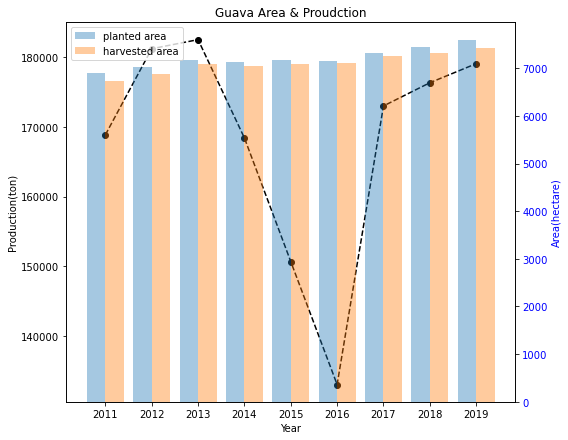

In [9]:
fig, ax1 = plt.subplots(figsize=(8,6))

width = 0.2
ax1.set_xticks(x)
ax1.plot(x, y["產量_公噸"], "--", marker="o", color="black")
ax1.set_xlabel("Year")
ax1.set_ylabel("Production(ton)", color="black")
ax1.tick_params(axis="y", labelcolor="black")

ax2 = ax1.twinx()
ax2.bar(x-width, y["種植面積_公頃"], width=0.4, alpha=0.4, label="planted area")
ax2.bar(x+width, y["收穫面積_公頃"], width=0.4, alpha=0.4, label="harvested area")
ax2.set_ylabel("Area(hectare)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

fig.tight_layout()
plt.title("Guava Area & Proudction")
plt.legend()
plt.savefig("Guava area & production.jpg", bbox_inches="tight")
plt.show()


In [10]:
df.dtypes

年度              int64
地區別            object
果品類別           object
種植株數          float64
收穫株數          float64
種植面積_公頃       float64
收穫面積_公頃       float64
每株平均產量_公斤     float64
每公頃平均產量_公斤    float64
產量_公噸         float64
dtype: object

### 取得2019年度全國芭樂生產資料

In [11]:
data = df.loc[(df["年度"] == 2019)]
data

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,番石榴,38469.0,37544.0,55.15,53.61,15.89,11131.37,596.75
1,2019,台北市,番石榴,2106.0,2106.0,3.35,3.35,14.37,9031.34,30.25
2,2019,桃園市,番石榴,17584.0,13838.0,29.05,22.84,15.78,9562.00,218.40
3,2019,台中市,番石榴,89075.0,87291.0,129.60,127.17,26.48,18175.94,2311.43
4,2019,台南市,番石榴,1198472.0,1196656.0,1499.21,1496.94,28.27,22596.20,33825.16
5,2019,高雄市,番石榴,2089619.0,2052118.0,2710.88,2661.62,31.63,24389.60,64915.85
6,2019,宜蘭縣,番石榴,120080.0,118580.0,210.14,207.17,38.48,22023.85,4562.68
7,2019,新竹縣,番石榴,12617.0,12497.0,19.17,18.94,26.65,17584.21,333.05
8,2019,苗栗縣,番石榴,27932.0,27786.0,44.27,44.07,29.58,18648.54,821.84
9,2019,彰化縣,番石榴,1103317.0,1075289.0,1299.91,1265.72,33.48,28444.30,36002.53


In [12]:
df_2019 = data[["地區別", "果品類別", "產量_公噸"]].sort_values(by="產量_公噸", ascending=False)

In [13]:
df_2019["地區別"] = df_2019["地區別"].str.replace("台", "臺")

In [14]:
df_2019.columns = ["COUNTYNAME","fruits", "production"]

In [15]:
df_2019.reset_index(drop=True, inplace=True)

In [16]:
df_2019

,COUNTYNAME,fruits,production
0,高雄市,番石榴,64915.85
1,彰化縣,番石榴,36002.53
2,臺南市,番石榴,33825.16
3,屏東縣,番石榴,13642.92
4,嘉義縣,番石榴,7296.29
5,雲林縣,番石榴,6990.18
6,宜蘭縣,番石榴,4562.68
7,南投縣,番石榴,4447.78
8,臺中市,番石榴,2311.43
9,臺東縣,番石榴,1748.43
